In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Train Dataset
train_df = pd.read_csv("Loan_Prediction.csv")

# Drop Loan_ID
train_df.drop("Loan_ID", axis=1, inplace=True)

# Fill missing categorical values with mode
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Fill missing numerical values with median
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# Fix Dependents
train_df["Dependents"] = train_df["Dependents"].astype(str).str.strip()
train_df["Dependents"] = train_df["Dependents"].replace("3+", "3")
train_df["Dependents"] = pd.to_numeric(train_df["Dependents"], errors="coerce")
train_df["Dependents"] = train_df["Dependents"].fillna(train_df["Dependents"].mode()[0]).astype(int)

# Encode Target
train_df["Loan_Status"] = train_df["Loan_Status"].map({"Y": 1, "N": 0})

# One-hot encoding
train_encoded = pd.get_dummies(train_df, drop_first=True)

# Split
X = train_encoded.drop("Loan_Status", axis=1)
y = train_encoded["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Preprocessing + Scaling Done")


 Preprocessing + Scaling Done


 Linear Kernel Test Accuracy: 0.8536585365853658


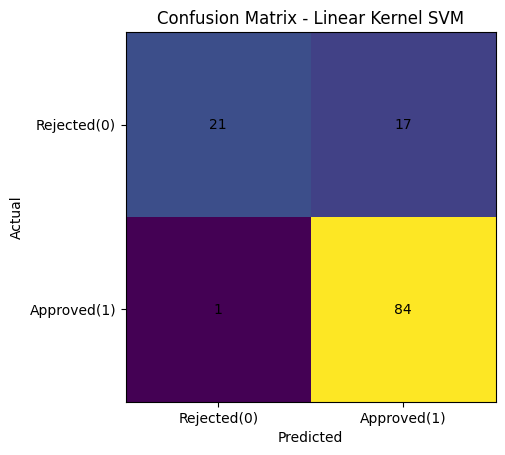

In [64]:
from sklearn.svm import SVC

# Train Linear Kernel SVM
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Accuracy
linear_test_acc = accuracy_score(y_test, y_pred_linear)
print(" Linear Kernel Test Accuracy:", linear_test_acc)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_linear)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Linear Kernel SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Rejected(0)", "Approved(1)"])
plt.yticks([0, 1], ["Rejected(0)", "Approved(1)"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


Polynomial Kernel Test Accuracy: 0.8455284552845529


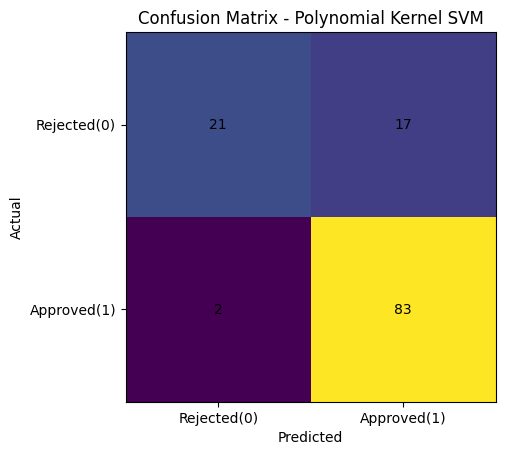

In [65]:
from sklearn.svm import SVC

# Train Polynomial Kernel SVM
svm_poly = SVC(kernel="poly", degree=3, C=1.0, gamma="scale", random_state=42)
svm_poly.fit(X_train_scaled, y_train)

# Predictions
y_pred_poly = svm_poly.predict(X_test_scaled)

# Accuracy
poly_test_acc = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel Test Accuracy:", poly_test_acc)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_poly)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Polynomial Kernel SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Rejected(0)", "Approved(1)"])
plt.yticks([0, 1], ["Rejected(0)", "Approved(1)"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


RBF Kernel Test Accuracy: 0.8536585365853658


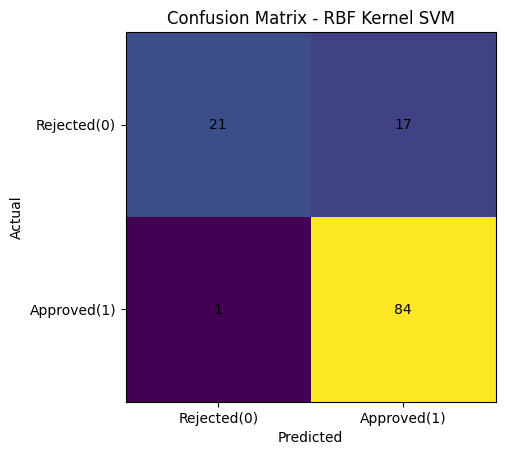

In [66]:
from sklearn.svm import SVC

# Train RBF Kernel SVM
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Accuracy
rbf_test_acc = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel Test Accuracy:", rbf_test_acc)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rbf)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - RBF Kernel SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Rejected(0)", "Approved(1)"])
plt.yticks([0, 1], ["Rejected(0)", "Approved(1)"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


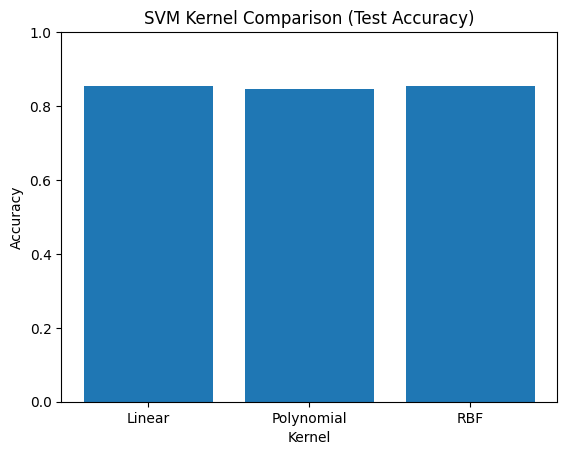

Linear Kernel Accuracy: 0.8537
Polynomial Kernel Accuracy: 0.8455
RBF Kernel Accuracy: 0.8537


In [68]:
kernels = ["Linear", "Polynomial", "RBF"]
accuracies = [linear_test_acc, poly_test_acc, rbf_test_acc]

plt.figure()
plt.bar(kernels, accuracies)
plt.title("SVM Kernel Comparison (Test Accuracy)")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

for k, acc in zip(kernels, accuracies):
    print(f"{k} Kernel Accuracy: {acc:.4f}")


In [ ]:
# Extract confusion matrix values
TN, FP, FN, TP = cm.ravel()

print(" Misclassification Analysis")
print("--------------------------------")
print("Eligible customers rejected (False Negative FN):", FN)
print("Risky customers approved (False Positive FP):", FP)

print("\n Correct Predictions")
print("--------------------------------")
print("Risky rejected correctly (True Negative TN):", TN)
print("Eligible approved correctly (True Positive TP):", TP)


✅ Misclassification Analysis
--------------------------------
Eligible customers rejected (False Negative FN): 1
Risky customers approved (False Positive FP): 17

✅ Correct Predictions
--------------------------------
Risky rejected correctly (True Negative TN): 21
Eligible approved correctly (True Positive TP): 84


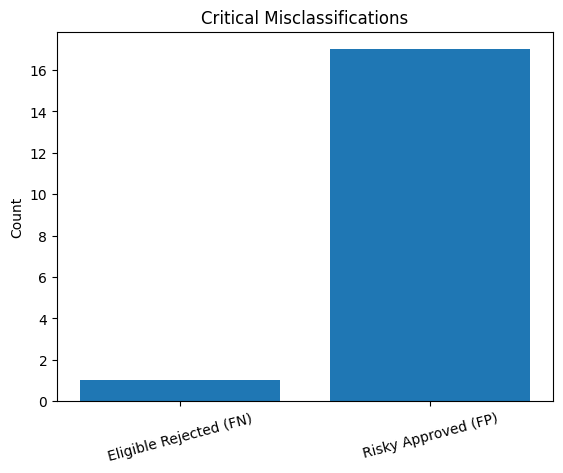

In [70]:
labels = ["Eligible Rejected (FN)", "Risky Approved (FP)"]
values = [FN, FP]

plt.figure()
plt.bar(labels, values)
plt.title("Critical Misclassifications")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()
